# Hint 1 - creating a square mask

**Example: Creating a 100 x 100 grid containing a square where the centre of that square is at (80, 40) and the width is 30.**

To check whether an (x, y) position is within the square we want to define, we want to evaluate if these two conditions are both satisfied:
$$|x - x_0| = w/2$$
and
$$|y - y_0| = w/2$$

where
 - $x$, $y$ are the x, y positions within the grid
 - $x_0$, $y_0$ are the centre of the square
 - $w$ - is both the full width and height of the square
 - $| |$ means the magnitude of the difference

This code will show one way to create a mask which contains a square. This will take the most direct approach and evaluate every index in the 2D array one at a time.

In [1]:
import numpy as np

shape = (100, 100)

Start by creating an array of zeros for our overall grid:

In [2]:
square_mask = np.zeros(shape)
print(square_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Next we can define the parameters we need for the square:

In [3]:
centre = (80, 40) # Centre (x, y)
width = 30 # Width of square

So, to check whether a given position is within our mask (the square we are defining), we need to find a way to use our equations above and write them in code.

We've created a grid of size of 100 x 100 so, as an example, let's use the position (50, 50) for our grid:

In [4]:
x = 50
y = 50

x0 = centre[0] # Define central x position for the square
y0 = centre[1] # Define central y position for the square

# Edge of square
# |x - x0| = width/2
# |y - y0| = width/2

distance_x = np.abs(x - x0) # Magnitude of distance - x-x0
distance_y = np.abs(y - y0) # Magnitude of distance - y-y0

# Use our conditions to check whether this (y, x) position is inside the square
if distance_x < width/2 and distance_y < width/2:
    print("Position is inside the mask")
    square_mask[y, x] = 1 # Using our index values, set to value within our array to 1 if this is inside the square
else:
    print("Position is not inside the mask")

Position is not inside the mask


Now we can build this up to look at every element in the 2D array we have created and check whether this is inside the square (we will leave the value as 0) or outside the square (we will set the value to 1). To do this we can loop through every column and every row and check the result of our conditions:

In [5]:
x0 = centre[0]
y0 = centre[1]

ncol = shape[0]
nrow = shape[1]

for y in range(nrow): # iterate over first dimension
    for x in range(ncol): # iterate over second dimension
        
        distance_x = np.abs(x - x0) # Magnitude of distance
        distance_y = np.abs(y - y0) # Magnitude of distance
        
        # Check whether each position is inside the square
        if distance_x < width/2 and distance_y < width/2:
            square_mask[y, x] = 1 # Set to 1 if inside the square

We don't need an `else` block here because the array we have defined *already contains zeros*. This means if our conditin doesn't match we don't need to update the values within the array.

We could check where our mask has been set to 1 using the `np.where` function. For a two-dimensional array like `square_mask`, this will return two arrays containing the positions of the match - one for the first dimension and one for the second dimension.

Each pair of values (one in the first array and one the second) represents a 2D position in our array:

In [6]:
# Where have we created our mask in our overall grid
np.where(square_mask == 1)

(array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,
        27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
        27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
        33, 

We can look at this mask using `matplotlib` and a plotting option called `imshow` ([documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html); [example from image gallery](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)):

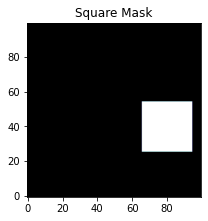

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3.2))

ax.set_title('Square Mask')
ax.imshow(square_mask,cmap="bone",origin="lower")

In this plot, the white represents the values in the mask (values of 1) and the black represents the values outside the mask (values of 0).

---

### Extended: Leveraging numpy functionality

An alternative and more efficient way to do this would be to leverage the properties of numpy arrays and the available numpy functions and indexing.

We can start in the same way and create our array of zeros of the right shape

In [8]:
square_mask_2 = np.zeros(shape)

We can represent the pixel position for our x and y dimensions using numbers for 0 to 99 (for x) and 0 to 99 (for y) since our shape is 100 x 100. 

We can then create a pair of 2D grids, `X` and `Y`, to match to the shape of our mask using a [function called `np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html). This stretches our x and y coordinate values to create our 2D numpy arrays.

In [9]:
# Create arrays matching to our size along our x and y axes
x = np.arange(shape[1])
y = np.arange(shape[0])

X, Y = np.meshgrid(x, y)

print(f"X array: {X.shape}")
print(X)
print(f"Y array: {Y.shape}")
print(Y)

X array: (100, 100)
[[ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 ...
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]]
Y array: (100, 100)
[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [97 97 97 ... 97 97 97]
 [98 98 98 ... 98 98 98]
 [99 99 99 ... 99 99 99]]


We can find the positions where our conditions are met within our grid using the [`np.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html). From here we can filter our mask using [integer array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#integer-array-indexing) and change these values from 0 to 1 within our mask.

In [10]:
# We can calculate the x and y distances for each value in our 2D grids
distance_x = np.abs(X - x0) # Magnitude of distance
distance_y = np.abs(Y - y0) # Magnitude of distance

# We can use the numpy where function to find the positions where our conditions are matched
# - to include multiple conditions we have included an & (known as a bitwise operator)
indices = np.where((distance_x < width/2) & (distance_y < width/2))

# And using these indices change the values to 1
square_mask_2[indices] = 1

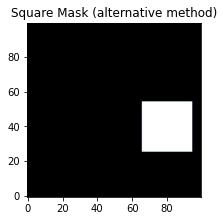

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3.2))

ax.set_title('Square Mask (alternative method)')
ax.imshow(square_mask_2,cmap="bone",origin="lower")

---